In [1]:
!mkdir datasets
%cd datasets
!pip install --upgrade pillow
!pip install ultralytics --quiet
!pip install roboflow --quiet

mkdir: cannot create directory ‘datasets’: File exists
/content/datasets


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="yG44Wj536Zq32qm1kv7o")
project = rf.workspace("kumaraguru-college-of-technology-gfdmc").project("nested-object-detection")
dataset = project.version(8).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.154, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Nested-Object-Detection-8 in yolov8:: 100%|██████████| 1747/1747 [00:00<00:00, 2182.11it/s]


In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# Train the model
model.train(data="/content/datasets/Nested-Object-Detection-8/data.yaml", epochs=100, imgsz=640,optimizer = "Adam", verbose = True)

In [5]:
model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')  # load a custom model
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.154 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/datasets/Nested-Object-Detection-8/valid/labels.cache... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]
                   all        125        235       0.83      0.843      0.899      0.659
            Motorcycle        125        190      0.904      0.953      0.965       0.81
            Pedestrian        125         45      0.757      0.733      0.832      0.508
Speed: 4.7ms preprocess, 6.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val


array([    0.80965,     0.50771])


image 1/1 /content/Test2.png: 640x640 1 Motorcycle, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


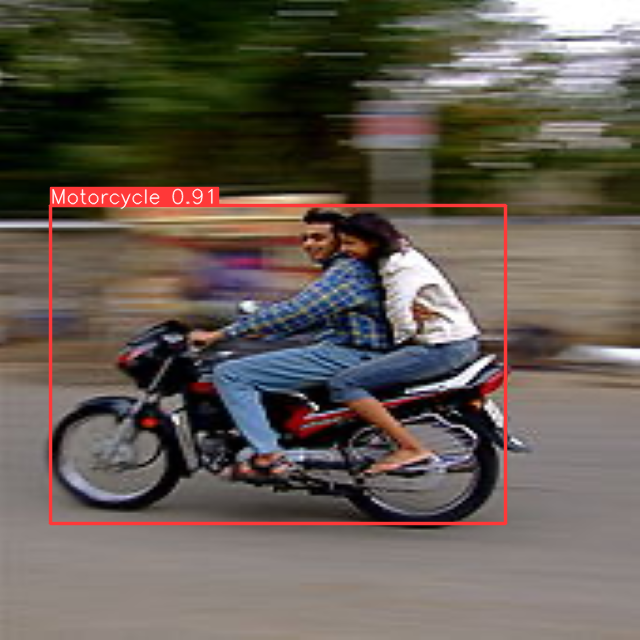

In [10]:
import glob
from IPython.display import Image, display

img = "/content/Test2.png"
res = model.predict(img, save=True, conf=0.5)

for image_path in glob.glob(f'/content/datasets/runs/detect/predict/*.png')[:3]:
      display(Image(filename=image_path, width=600))

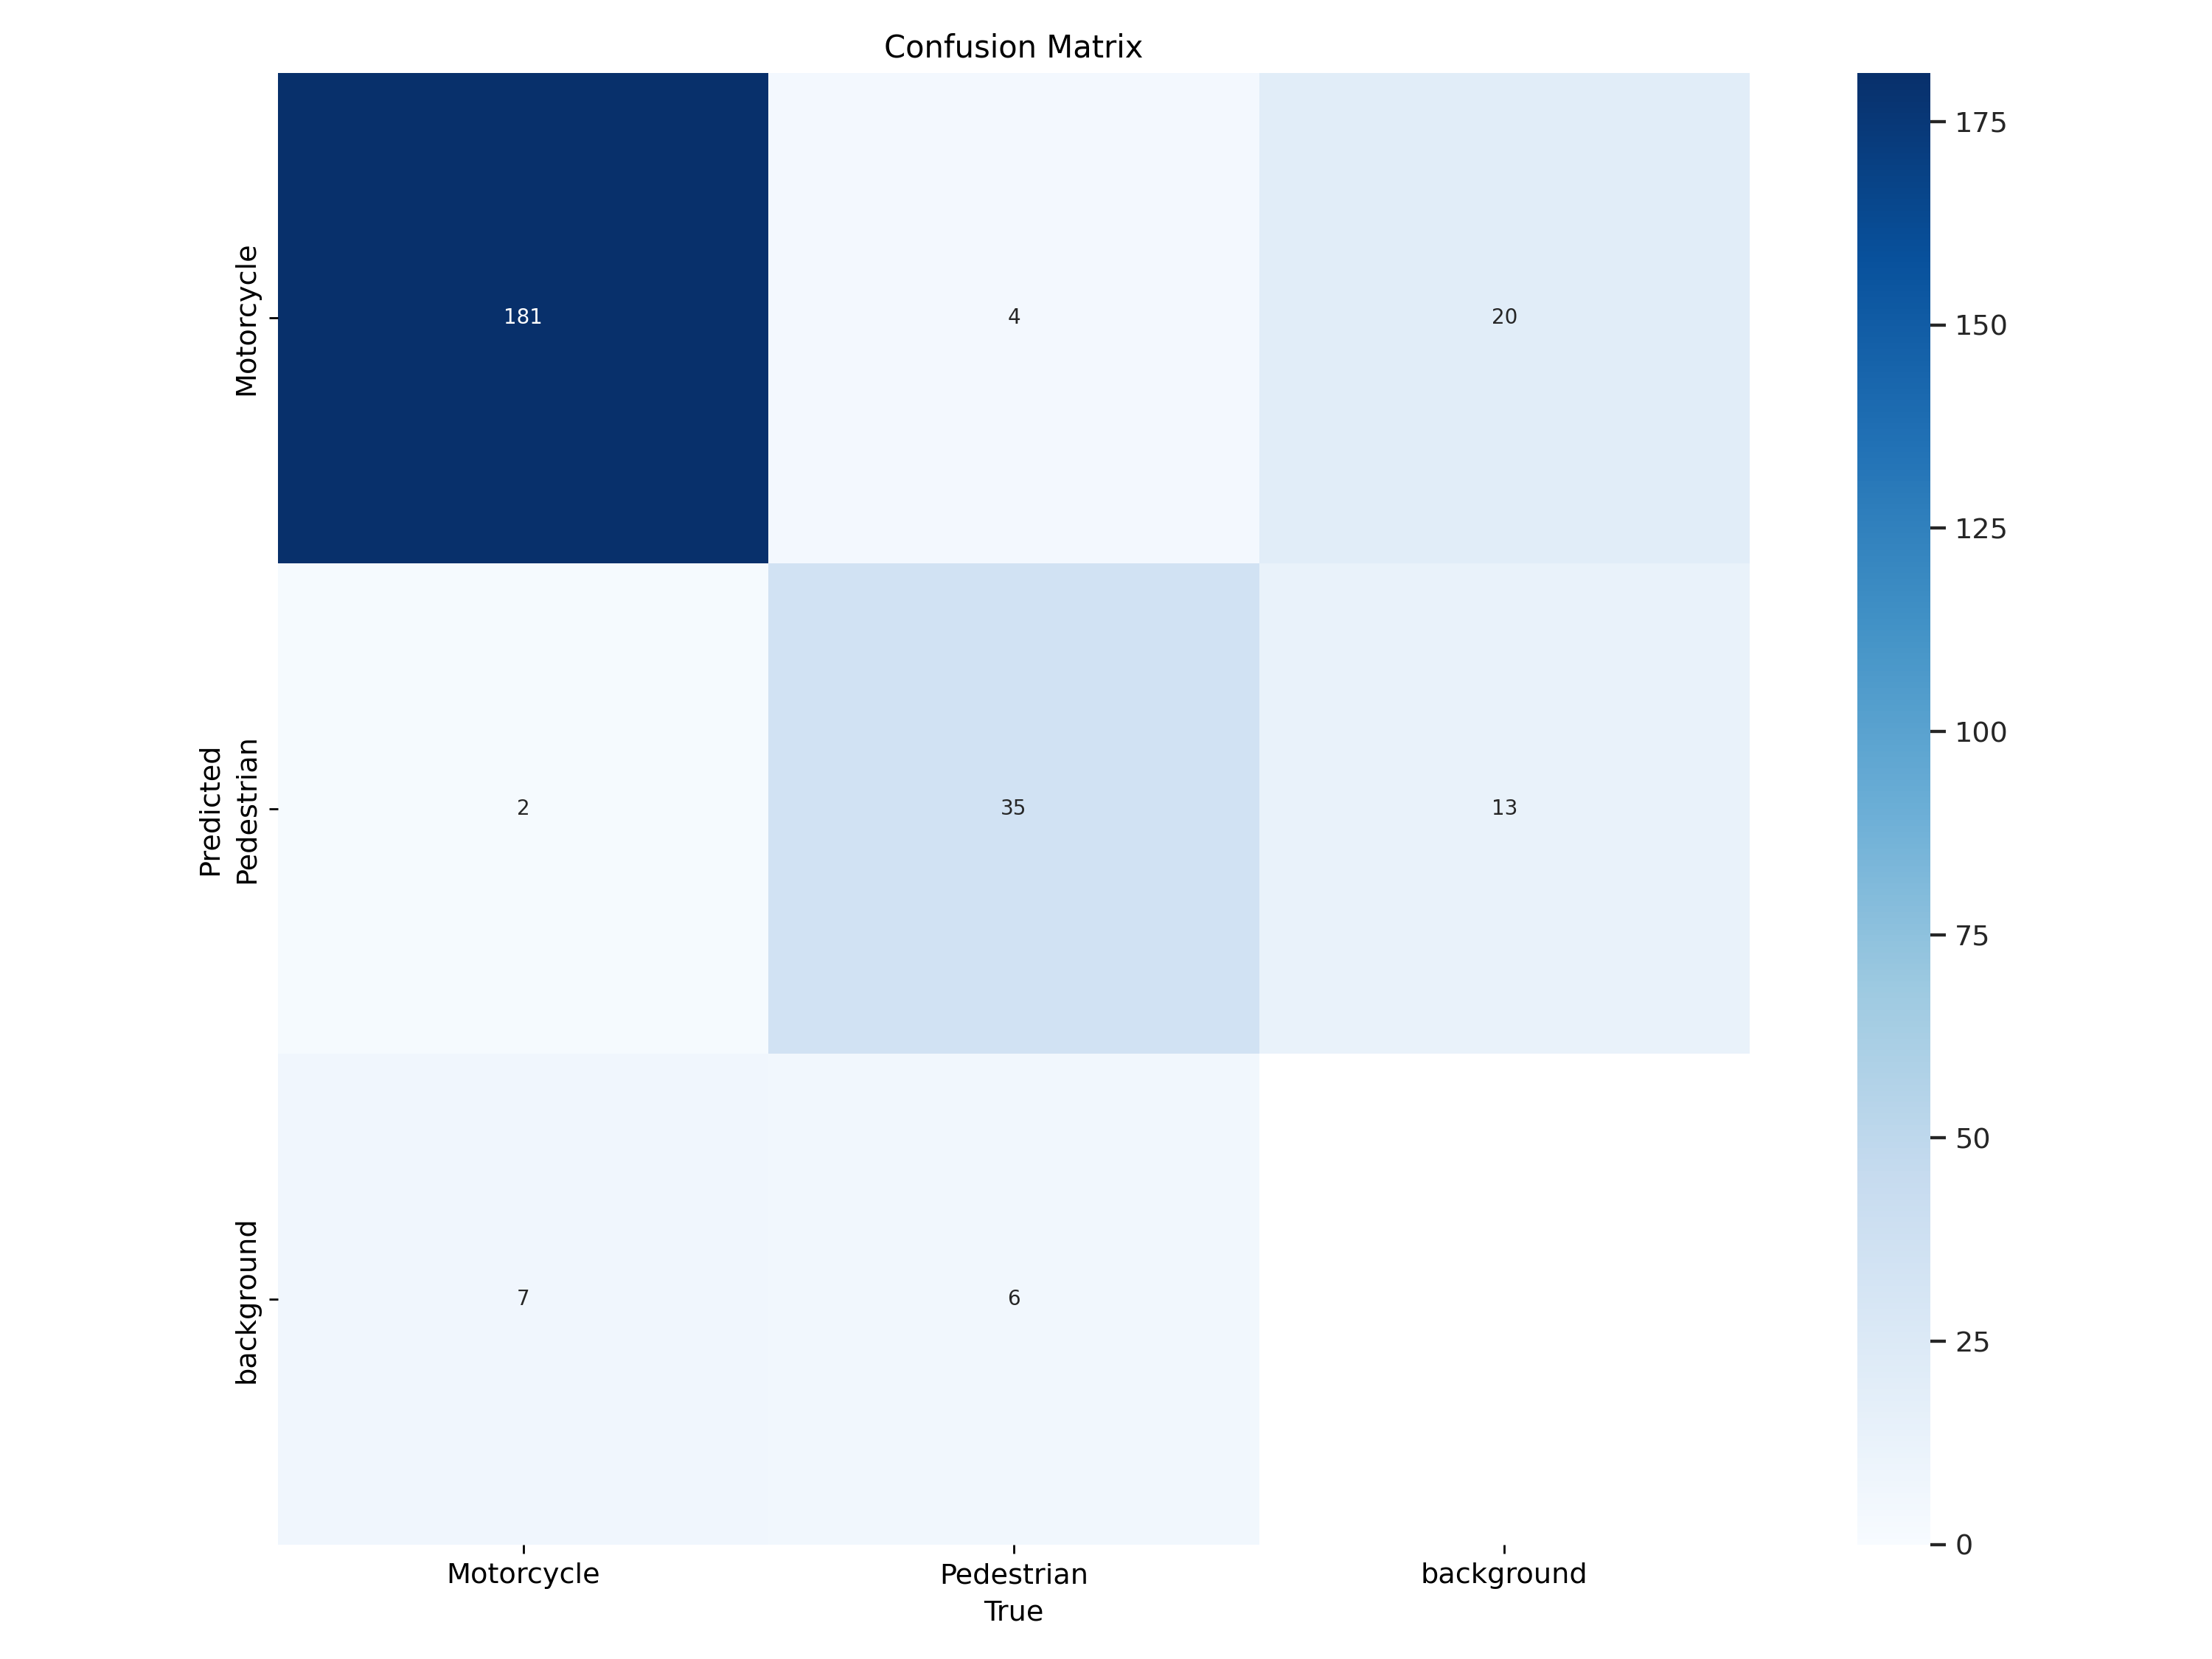

In [11]:
Image(filename='/content/datasets/runs/detect/train/confusion_matrix.png', width=600)

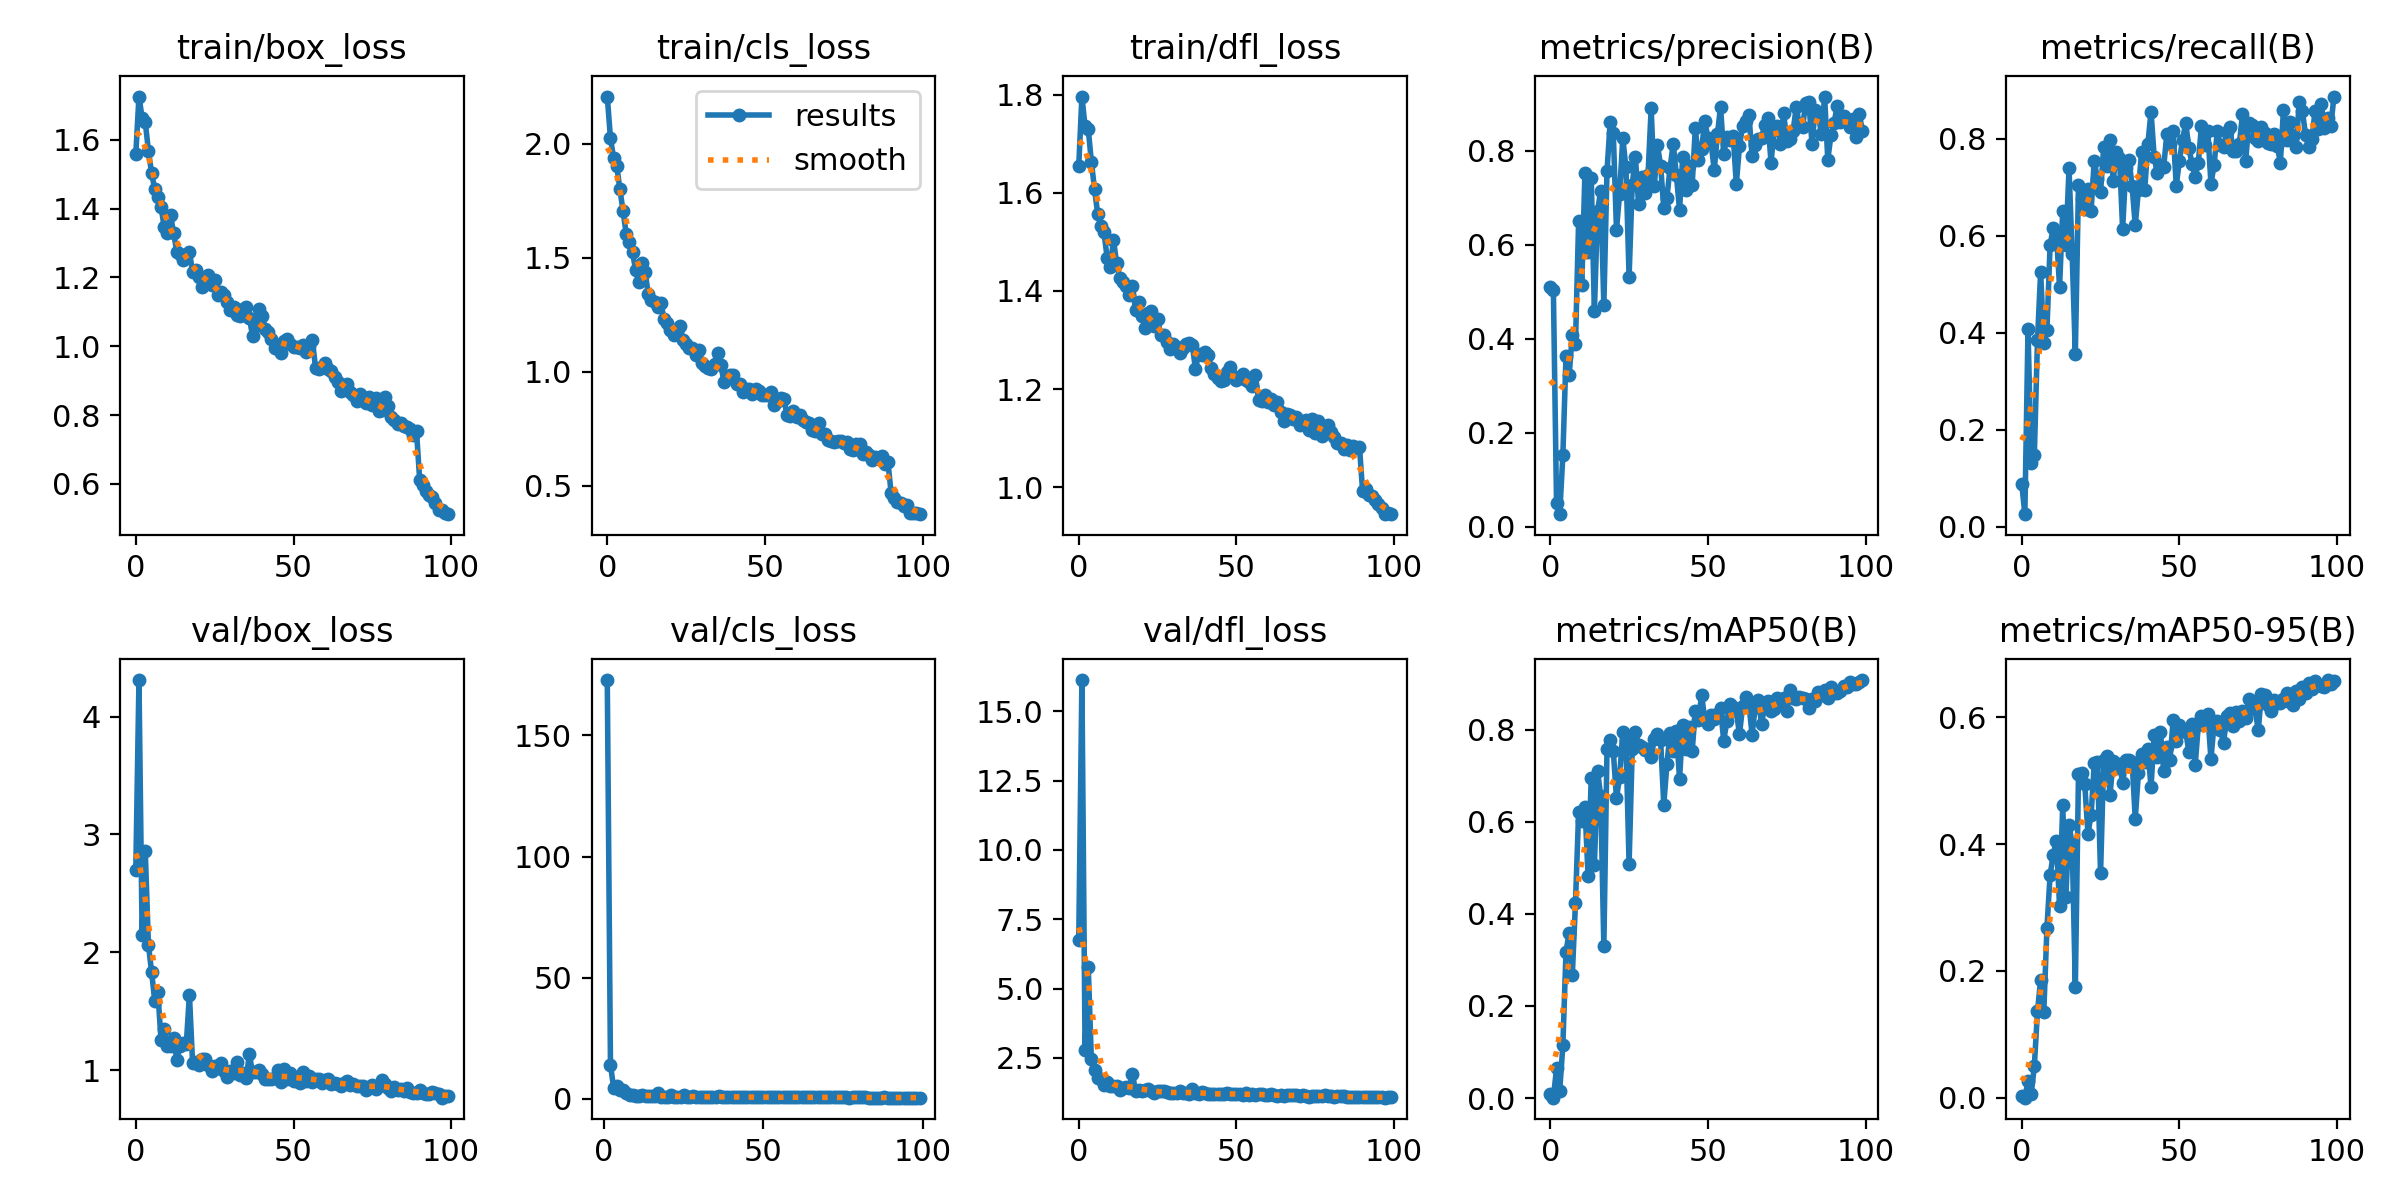

In [12]:
Image(filename='/content/datasets/runs/detect/train/results.png', width=600)

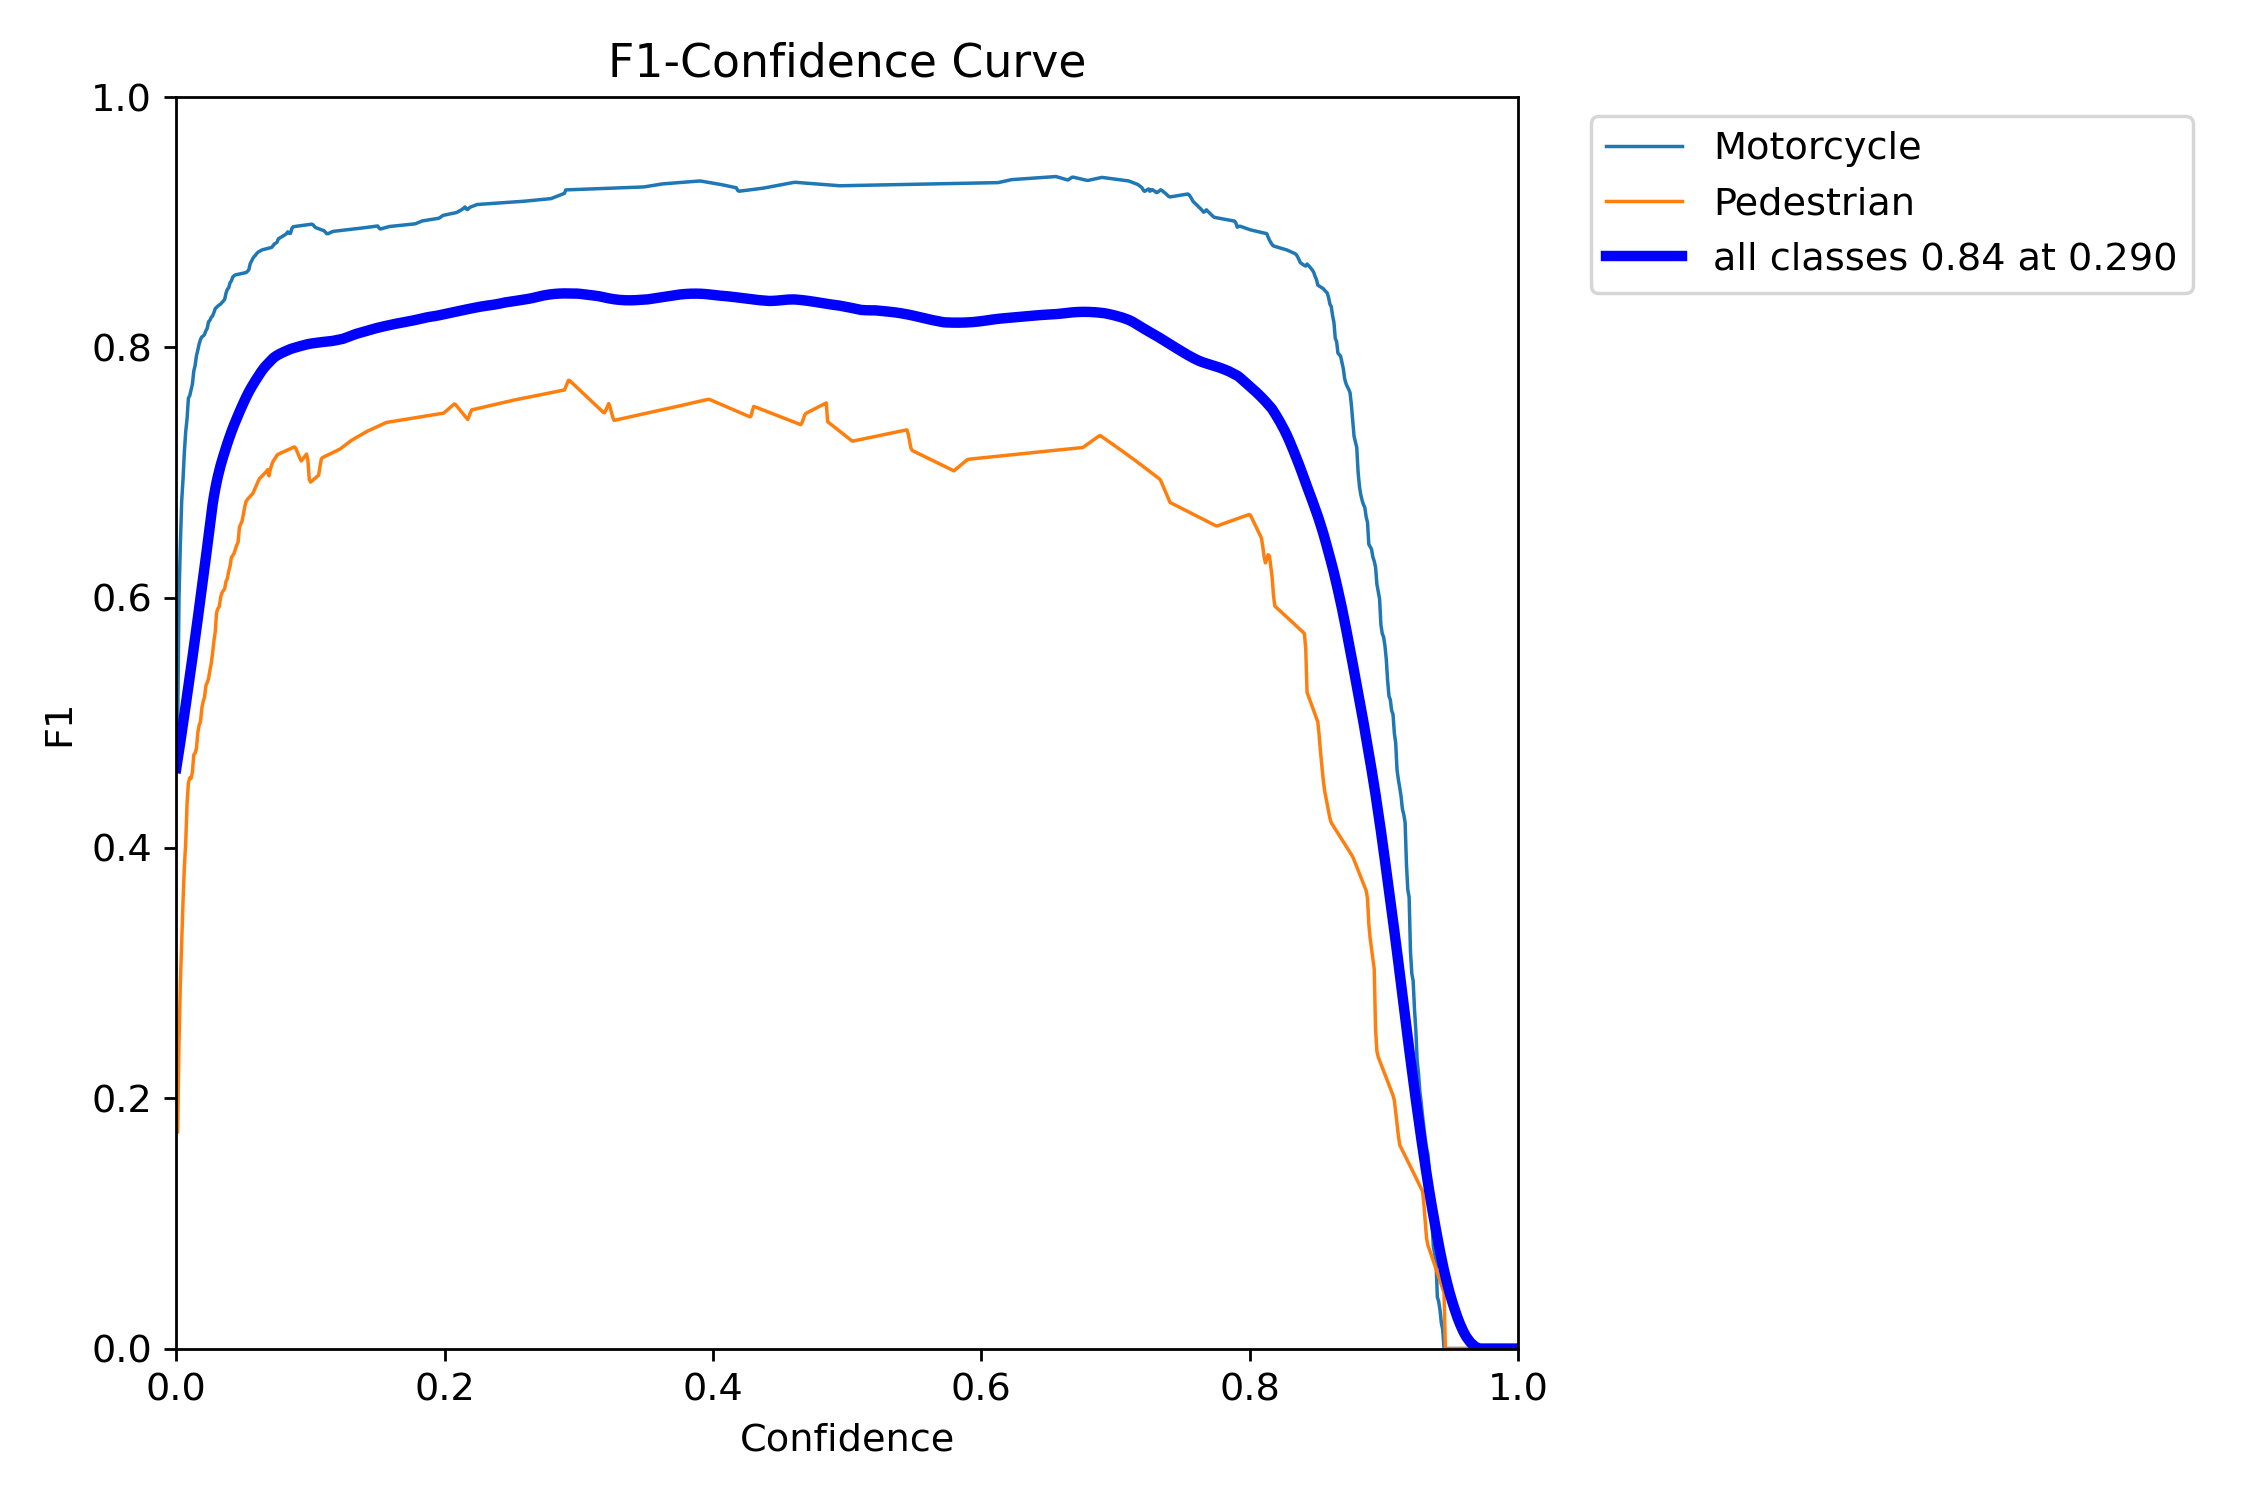

In [14]:
Image(filename='/content/datasets/runs/detect/train/F1_curve.png', width=600)